In [1]:
%load_ext autoreload
%autoreload 2

# Task Overview

In this task, your goal is to verify the impact of data noise level in neural network training.
You should use MLP architecture trained on MNIST dataset (like in previous lab exercises).


We will experiment with two setups:
1. Pick X. Take X% of training examples and reassign their labels to random ones. Note that we don't change anything in the test set.
2. Pick X. During each training step, for each sample, change values of X% randomly selected pixels to random values. Note that we don't change anything in the test set.

For both setups, check the impact of various levels of noise (various values of X%) on model performance. Show plots comparing crossentropy (log-loss) and accuracy with varying X%, and also comparing two setups with each other.
Prepare short report briefly explaining the results and observed trends. Consider questions like "why accuracy/loss increases/decreases so quickly/slowly", "why Z is higher in setup 1/2" and any potentially surprising things you see on charts.

## Main Setting

The model have been chosen for the experiments is in line with the artificial neural network model that was used in laboratories number 4 during the introduction of the Pytorch environment. This network consists of 2 layers of 128 (hidden) and 10 (output) neurons. The entrance to the network is flattened to give 784 units. After the hidden layer the relu activation function is applied, and the negative log likelihood loss is applied to the linear output. SGD was chosen as the optimizer with learning rate and weight decay parameters during grid search. No augmentation has been applied. Batch size equals 100.

In [2]:
import numpy as np
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
from trainer import Trainer, IteratorParams
from data import loaders
from model import Net

params_trainer = {
    'model': Net,
    'loaders': loaders,
    'criterion': torch.nn.NLLLoss,
    'optim': torch.optim.SGD
}

trainer = Trainer(**params_trainer)

For the appropriate experiments, hyperparameters will be selected that give the lowest log loss on the test set, being trained on the entire training set.

## Pre Experiment: Pick learning rate and weight decay parameters

To pick learning rate and weight decay parameters grid search is applied with 25 epochs per run.

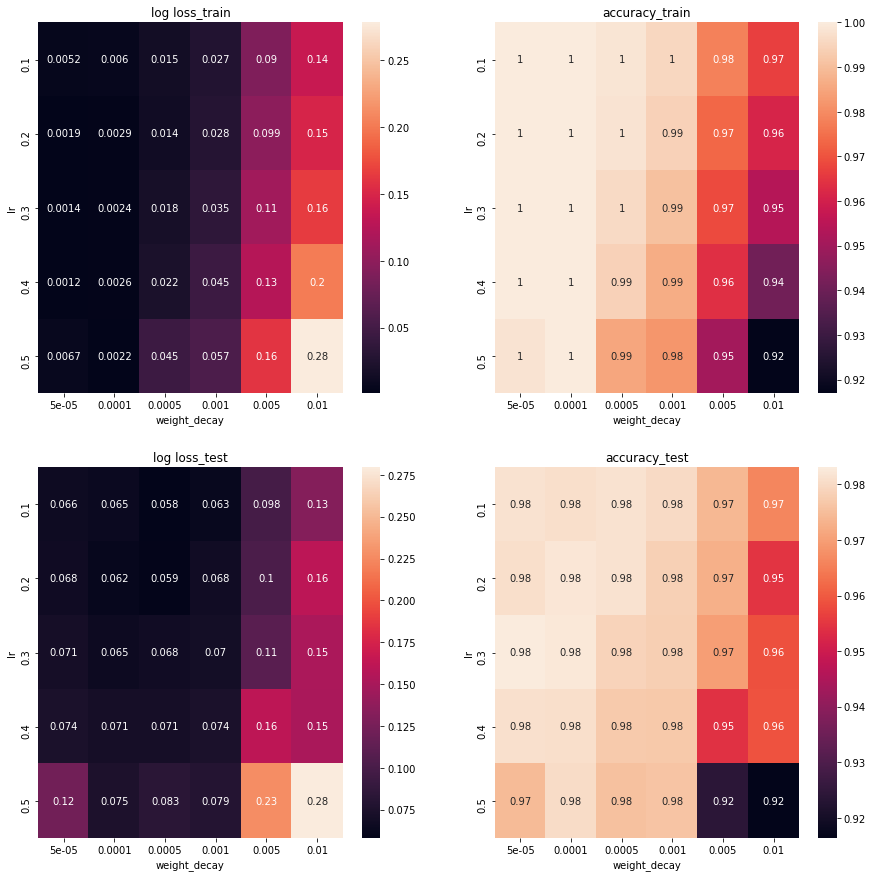

In [6]:
wd_arr = np.concatenate([np.cumproduct([0.1]*3), np.cumproduct([0.1]*3)/2]) / 10
lr_arr = np.arange(0.1, 0.55, step=0.1)

model_ls = [{'dims':tuple([784, 128, 10])}]
loaders_ls = [{'exp_no':0, 'batch_size':100}]
criterion_ls = [{}]
optim_ls = [{'lr': round(lr, 3), 'weight_decay': round(wd, 5)} for lr in lr_arr for wd in wd_arr]

iter_params = IteratorParams(model_ls, loaders_ls, criterion_ls, optim_ls)

params_runs = {
    'iter_params': iter_params,
    'epochs': 25,
    'exp_name': 'pick_lr_&_wd',
    'key_params': ['lr', 'weight_decay'],
    'device': device
}

trainer.run_trainer(**params_runs)

The final plot shows the net result at the end of each run. This does not exclude a situation where the minimum or maximum of the measured quantity is obtained at the previous stages of the run. Fortunately, the visual overview of the results allows one to justify choosing 0.058 as the lowest log loss result, and take parameters wd=0.0005, lr=0.1 as a result. There is room for improvement.

## Pre Experiment: Pick number of epochs

Number of epochs is chosen through an arbitrary decision of plateau of the learning curve.

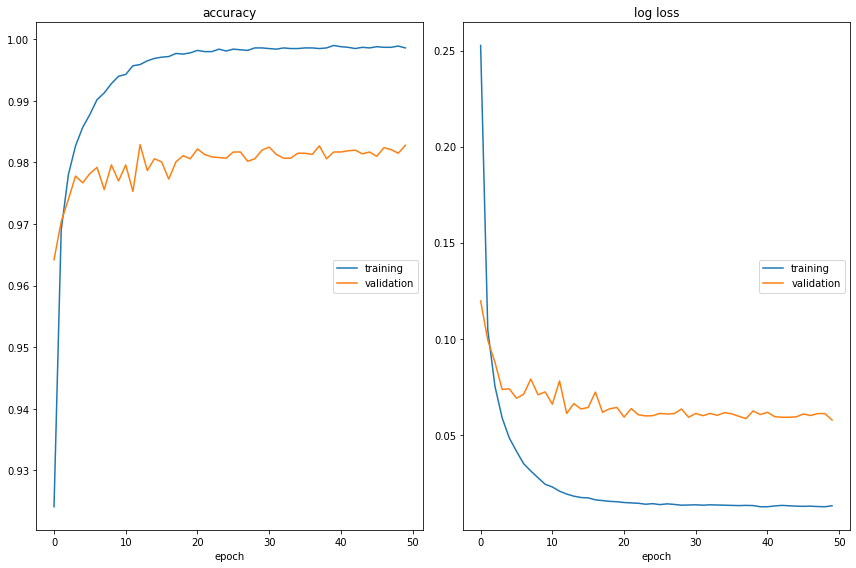

In [8]:
model_ls = [{'dims':tuple([784, 128, 10])}]
loaders_ls = [{'exp_no':0, 'batch_size':100}]
criterion_ls = [{}]
optim_ls = [{'lr': 0.1, 'weight_decay':0.0005}]

iter_params = IteratorParams(model_ls, loaders_ls, criterion_ls, optim_ls)

params_runs = {
    'iter_params': iter_params,
    'epochs': 50,
    'exp_name': 'single_run',
    'key_params': None,
    'device': device
}

trainer.run_trainer(**params_runs)

Number 25 is chosen.

## Experiment 1: with randomized labels

The distribution of classes in the training set is almost uniform, therefore the labels are drawn uniformly.

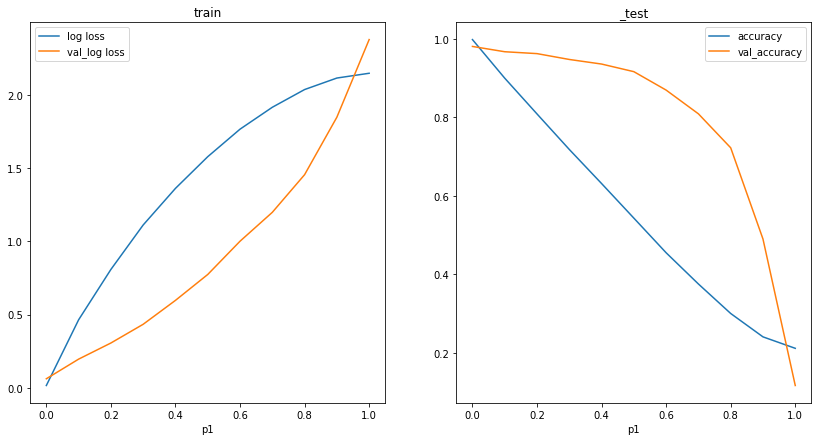

In [11]:
model_ls = [{'dims':tuple([784, 128, 10])}]
loaders_ls = [{'exp_no':1, 'batch_size':100, 'p1': round(p, 1)} for p in np.linspace(0, 1, 11)]
criterion_ls = [{}]
optim_ls = [{'lr': 0.1, 'weight_decay': 0.0005}]

iter_params = IteratorParams(model_ls, loaders_ls, criterion_ls, optim_ls)

params_runs = {
    'iter_params': iter_params,
    'epochs': 25,
    'exp_name': 'exp1',
    'key_params': ['p1'],
    'device': device
}

trainer.run_trainer(**params_runs)

The graph shows the result at the end of each run.

## Training models in setup 2: with randomized pixels.

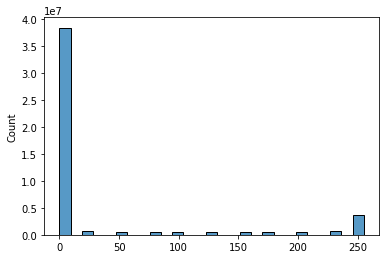

In [13]:
a,b = trainer.pre_exp2(plot=True)

Pixel has almost binary (0-255) distribution. The selected p values are a multiple of 0.1 starting from 0.

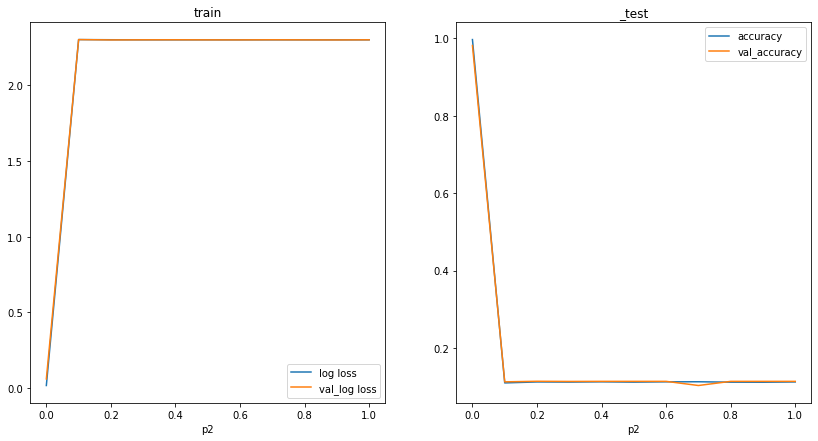

In [7]:
model_ls = [{'dims':tuple([784, 128, 10])}]
loaders_ls = [{'exp_no':2, 'batch_size':100, 'p2': round(p, 2)} for p in np.linspace(0, 1, 11)]
criterion_ls = [{}]
optim_ls = [{'lr': 0.2, 'weight_decay': 0.0005}]

iter_params = IteratorParams(model_ls, loaders_ls, criterion_ls, optim_ls)

params_runs = {
    'iter_params': iter_params,
    'epochs': 15,
    'exp_name': 'exp2',
    'key_params': ['p2'],
    'device': device
}

trainer.run_trainer(**params_runs)

Unfortunately, for reasons unknown to me, this experiment could not be carried out in this setting. This part of the experiment was presented in the notebook GSN / DNN 2021/22 - Homework 1_ BK.ipynb